In [52]:
import sys
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
!pip install kora -q
import kora.install.rdkit
from rdkit import Chem

In [4]:
import os
os.chdir("/content/drive/MyDrive")

In [6]:

filename = "in-man.txt"
with open(filename) as f:
    	rt = "\n".join(line.strip() for line in f)

In [1]:
import os
os.getcwd()

'/content'

In [50]:

uqchars = sorted(list(set(rt)))
chartoint = dict((c, i) for i, c in enumerate(uqchars)); chartoint.update({-1 : "\n"})
intochar = dict((i, c) for i, c in enumerate(uqchars)); intochar.update({"\n" : -1})

mappingsize = len(chartoint); rmappingsize = len(intochar)

In [10]:

assert mapping_size == reverse_mapping_size

nchars = len(rt)
nvocab = len(unique_chars)

slen = 80
X = []
Y = []
for i in range(0, n_chars - slen, 1):
	seq_in = rt[i:i + slen]
	seq_out = rt[i + slen]
	X.append([chartoint[char] for char in seq_in])
	Y.append(chartoint[seq_out])

n = len(X)

X = np.reshape(X, (n, slen, 1)); X = X / float(nvocab)

 Y = np_utils.to_categorical(Y)


Total number of characters in the file is:  2266945


In [54]:

model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(1024, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1], activation='softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer='adam')

print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 137, 128)          66560     
_________________________________________________________________
dropout_5 (Dropout)          (None, 137, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 137, 256)          394240    
_________________________________________________________________
dropout_6 (Dropout)          (None, 137, 256)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 137, 512)          1574912   
_________________________________________________________________
dropout_7 (Dropout)          (None, 137, 512)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 137, 1024)        

In [35]:
model.fit(X, Y, epochs = 10, batch_size=1000)

Epoch 1/10
2267/2267 [==============================] - 644s 282ms/step - loss: 1.0651
Epoch 2/10
2267/2267 [==============================] - 639s 282ms/step - loss: 0.9146
Epoch 3/10
2267/2267 [==============================] - 639s 282ms/step - loss: 0.8355
Epoch 4/10
2267/2267 [==============================] - 640s 282ms/step - loss: 0.7844
Epoch 5/10
2267/2267 [==============================] - 640s 282ms/step - loss: 0.7500
Epoch 6/10
2267/2267 [==============================] - 639s 282ms/step - loss: 0.7300
Epoch 7/10
2267/2267 [==============================] - 639s 282ms/step - loss: 0.7090
Epoch 8/10
2267/2267 [==============================] - 638s 282ms/step - loss: 0.6992
Epoch 9/10
2267/2267 [==============================] - 641s 283ms/step - loss: 0.6834
Epoch 10/10
2267/2267 [==============================] - 640s 282ms/step - loss: 0.6752


In [40]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [60]:
start = np.random.randint(3, len(X)-1)
pattern = X[start]
print ("\"", ''.join([intochar[value] for value in pattern]), "\"")

for y in range(12):
	x = np.reshape(pattern, (1, len(pattern), 1))
	pred = model.predict(x, verbose=0)
	index = np.argmax(pred)
	result = intochar[index]; seq_in = [intochar[value] for value in pattern]
	sys.stdout.write(result); pattern.append(index)
	pattern = pattern[1:len(pattern)]


" cc(C#N)c(Cl)c1)C(C)(C)c1ccccc1
CCOc1ccccc1OCC(=O)N(C)CC#N
COc1cccc2sc(N(CC[NH+](C)C)C(=O)CN3C(=O)c4ccccc4C3=O)nc12
Cc1ccn2nc(N[C@@H](C)c3 "
////////////

In [61]:
start = np.random.randint(3, len(X)-1)
pattern = X[start]
print ("\"", ''.join([intochar[value] for value in pattern]), "\"")


for i in range(9):
	x = np.reshape(pattern, (1, len(pattern), 1))
	pred = model.predict(x, verbose=0)
	ind = np.argmax(pred)
	result = intochar[ind]; seq_in = [intochar[value] for value in pattern]
	sys.stdout.write(result); pattern.append(index)
	pattern = pattern[1:len(pattern)]


" @@H]2CN(Cc3[nH+]ccn3C)C[C@H]2C(=O)[O-])c1
CC(C)Cn1cnnc1[C@@H]1CCCN1C(=O)c1cccc(SCC#N)c1
CN(Cc1nccs1)c1ccc([N+](=O)[O-])cc1[N+](=O)[O-]
Cc "
/////////

In [64]:
start = np.random.randint(9873, len(X)-1)
pattern = X[start]
print ("\"", ''.join([intochar[value] for value in pattern]), "\"")


for i in range(9):
	x = np.reshape(pattern, (1, len(pattern), 1))
	pred = model.predict(x, verbose=0)
	ind = np.argmax(pred)
	result = intochar[ind]
	seq_in = [intochar[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(ind)
	pattern = pattern[1:len(pattern)]

" C3/C(=N)N4N=CSC4=NC3=O)cc2Cl)cc1
CC1CCC(NC(=O)CS(=O)(=O)C[C@H]2CCCO2)CC1
O=C1N[C@](c2cccnc2)(C2CC[NH2+]CC2)C(=O)N1CCO
Cc1occc(=O)c1OCC(=O "
/////////

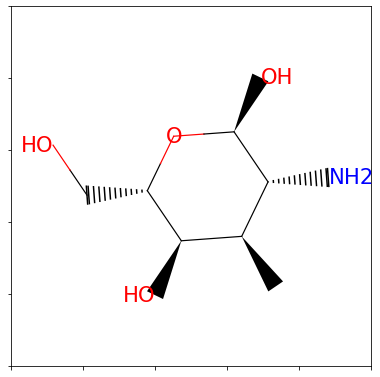

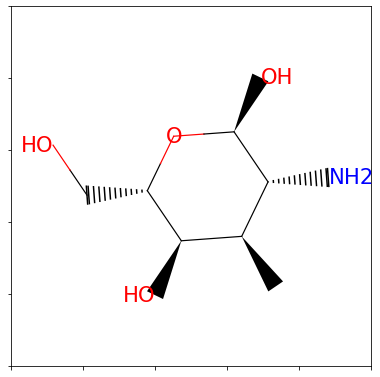

In [57]:
#Plotting the new molecule 

from rdkit.Chem import Draw
mole_smile = "C[C@H]1[C@@H](O)[C@H](CO)O[C@@H](O)[C@@H]1N"
mole = Chem.MolFromSmiles(mole_smile)
Draw.MolToMPL(mole, size=(250,200))